# Exercícios de Fixação de Conceitos 1

### Índice
- [Definição do problema de classificação](#definicao_problema)
- [*Dataset*: consideraçõs e análise](#dataset_consideracoes_analise)
    - [Estrutura do *dataset*](#estrutura_dataset)
    - [Distribuição de frequências em função das classes (Histograma)](#dist_frequencias_histograma)
    - [Visualização de imagens de dígitos manuscritos](#visualizacao_imagens)
- [Conjuntos de treinamento e validação](#conjunto_treinamento_validacao)
    - [Validação cruzada](#validacao_cruzada)
    - [Dados balanceados e representativos](#dados_balanceados_representativos)
- [Classificador Linear](#modelo_linear)
    - [Modelo linear regularizado](#modelo_linear_regularizado)
    - Parâmetros de desempenho
        - Erro quadrático médio
        - Erro de classificação
- Resolução do problema
    - Algoritmo de resolução
- Resultados
    - Gráficos semilog do desempenho dos classificadores junto aos dados de validação para os 11 valores de coeficientes de regularização sugeridos
        - Desempenho baseado no erro quadrático médio
        - Desempenho baseado no erro de classificação
    - Gráficos semilog com uma busca refinida no entorno do mínimo dos gráficos anteriores
        - Desempenho baseado no erro quadrático médio
        - Desempenho baseado no erro de classificação
    - Valores dos 4 coeficientes de regularização encontrados na busca
    - Para o melhor classificador considerando o desempenho baseado no erro de classificação:
        - Obter a matriz de parâmetros do modelo
        - Gerar um gráfico de calor para cada um dos 10 classificadores lineares contidos no modelo
        - Matriz de confusão
        - Exemplos de dígitos classificados incorretamente

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
from sklearn.model_selection import train_test_split

In [2]:
def onehot_to_categorical(y_onehot):
    aux = y_onehot.argmax()
    if aux < 9:
        return aux + 1
    else:
        return 0

In [3]:
def plot_hist(y_categorical, titleText, ymax, step):
    plt.figure(figsize=(8,4))
    
    plt.xlabel('Classes')
    plt.ylabel('Frequência')
    plt.xticks(range(0,10))
    plt.yticks(range(0, ymax, step))

    plt.title(titleText)
    #plt.grid(True, axis='y')

    a = plt.hist(y_categorical, range=(-0.5, 9.5), bins=20, align='left', color='royalblue');
    return a

In [4]:
def plot_digit_images(X, Y_categorical, titlesText, Nimgs=5):
    plt.figure(figsize=(15,4))
    i = rn.randint(0, X.shape[0])

    for index, (image, label) in enumerate(zip(X[i:i+Nimgs], Y_categorical[i:i+Nimgs])):
        plt.subplot(1, Nimgs, index + 1)
        X_image = np.transpose(np.reshape(image, (28, 28)))
        plt.imshow(X_image, cmap='gray')
        plt.title(titlesText + f'{label}\n', fontsize = 12)

In [5]:
path = '../EFC1/dataset/'

data = scipy.io.loadmat(path + 'data.mat')
test = scipy.io.loadmat(path + 'test.mat')

X = data['X'] 
Y = data['S'] 

Xtest = test['Xt']
Ytest = test['St']

Y_categorical = np.array(tuple(map(onehot_to_categorical, Y)))
Ytest_categorical = np.array(tuple(map(onehot_to_categorical, Ytest)))

-------------------------------------------------------------
<a id="definicao_problema"></a>
### Definição do problema

- O objetivo deste exercício consiste em sintetizar modelos lineares para classificação de padrões.
- É utilizado o famoso *dataset* de imagens de dígitos manuscritos [MNIST](http://yann.lecun.com/exdb/mnist/), o qual contém 60.000 amostras para treinamento e 10.000 amostras para teste.
- Cada imagem de entrada contém 784 pixels (no intervalo [0, 255], correspondente a níveis de cinza), visto que a dimensão de cada uma delas é de 28x28 pixels.
- O problema de classificação investigado é do tipo multi-classe (10 classes), sendo que cada classe representa um dígito de 0 a 9.

-----------------------------------------------------------------
<a id="dataset_consideracoes_analise"></a>
### *Dataset*: Considerações e Análise

<a id="estrutura_dataset"></a>
- **Estrutura do** ***dataset*** **:**
    - Os dados de treinamento estão contidos nas matrizes X (entradas) e Y (saídas).
    
    - Matriz X:
        - Cada linha representa uma amostra de entrada (imagem).
        - Cada coluna contém um pixel da amostra de entrada.
        - A dimensão da matriz X é de 60.000x784 (Temos 60.000 amostras cada uma com 784 pixels).
        
    - Matriz Y:
        - Cada linha representa a saída verdadeira correspondente a uma amostra de entrada.
        - Cada saída está na representação *one-hot encoding*, isto é, só existe um elemento não nulo responsável por indicar a classe a qual a amostra pertence.
        - Cada coluna representa uma classe:
            - Colunas 0 a 8 representam as classes referentes aos dígitos 1 a 9, respectivamente.
            - Coluna 9 representa a classe referente ao dígito 0.
    
    - As matrizes Xtest e Ytest do conjunto de teste possuem as mesmas características acima
        - A dimensão da matriz Xtest é de 10.000x784 (Temos 10.000 amostras cada uma com 784 pixels
        - A dimensão da matriz Ytest é de 10.000x10.

In [6]:
print(f'Dimensão da matriz X: {X.shape}')
print(f'Dimensão da matriz Y: {Y.shape}')
print('--------------------------------------')
print(f'Dimensão da matriz Xtest: {Xtest.shape}')
print(f'Dimensão da matriz Ytest: {Ytest.shape}')

Dimensão da matriz X: (60000, 784)
Dimensão da matriz Y: (60000, 10)
--------------------------------------
Dimensão da matriz Xtest: (10000, 784)
Dimensão da matriz Ytest: (10000, 10)


In [7]:
n1 = rn.randint(0, Y.shape[0])
n2 = rn.randint(0, Ytest.shape[0])

print('Exemplo do conjunto de treinamento:')
print(f'Saída na representação one-hot encoding: {Y[n1]}')
print(f'Saída na representação categórica: {Y_categorical[n1]}')

print('--------------------------------------------------------------')

print('Exemplo do conjunto de teste:')
print(f'Saída na representação one-hot encoding: {Ytest[n2]}')
print(f'Saída na representação categórica: {Ytest_categorical[n2]}')

Exemplo do conjunto de treinamento:
Saída na representação one-hot encoding: [0 0 0 1 0 0 0 0 0 0]
Saída na representação categórica: 4
--------------------------------------------------------------
Exemplo do conjunto de teste:
Saída na representação one-hot encoding: [0 0 1 0 0 0 0 0 0 0]
Saída na representação categórica: 3


<a id="dist_frequencias_histograma"></a>
- **Distribuição de frequências em função das classes (Histograma)**

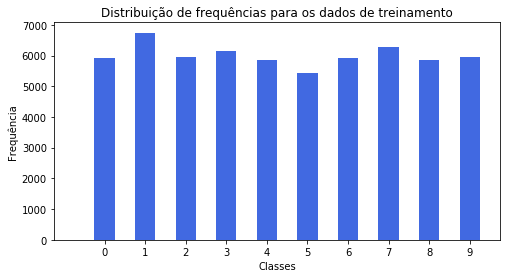

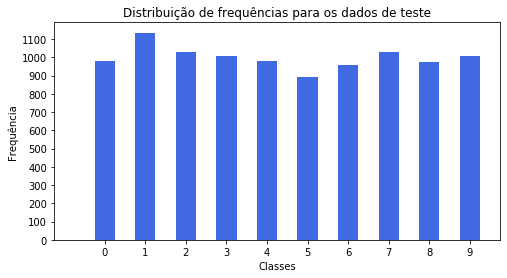

In [8]:
plot_hist(Y_categorical, titleText='Distribuição de frequências para os dados de treinamento', ymax=10000, step=1000);
plot_hist(Ytest_categorical, titleText='Distribuição de frequências para os dados de teste', ymax=1200, step=100);

<a id="visualizacao_imagens"></a>
- **Visualização de imagens de dígitos manuscritos**

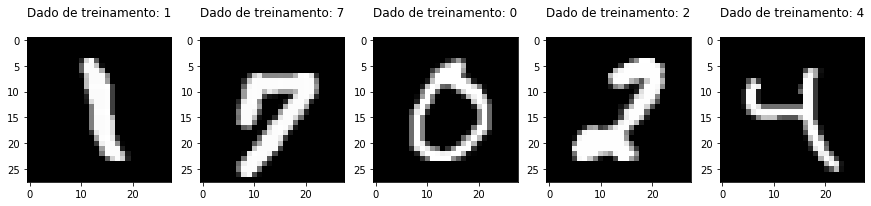

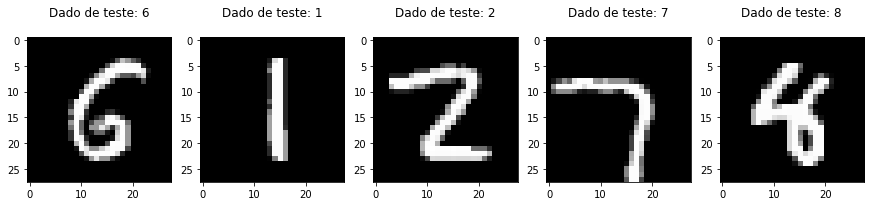

In [9]:
plot_digit_images(X, Y_categorical, titlesText='Dado de treinamento: ', Nimgs=5)
plot_digit_images(Xtest, Ytest_categorical, titlesText='Dado de teste: ', Nimgs=5)

-----------------------------------------------------------------
<a id="conjunto_treinamento_validacao"></a>
### Conjuntos de treinamento e validação

<a id="validacao_cruzada"></a>
- **Validação cruzada**
    - Para aumentar a **capacidade de generalização** do modelo, é utilizado a estratégia de validação cruzada conhecida por ***holdout***, em que dividimos as amostras de treinamento da seguinte forma:
        - Conjunto de treinamento: 80% das amostras são utilizadas para treinar o modelo, de modo a produzir um classificador.
        - Conjunto de validação: 20% das amostras são utilizadas para validar o modelo gerado, isto é, são utilizadas na etapa de análise de desempenho.

In [10]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
print(f'Dimensão da matriz Xtrain: {Xtrain.shape}')
print(f'Dimensão da matriz Ytrain: {Ytrain.shape}')
print('--------------------------------------')
print(f'Dimensão da matriz Xval: {Xval.shape}')
print(f'Dimensão da matriz Yval: {Yval.shape}')

Dimensão da matriz Xtrain: (48000, 784)
Dimensão da matriz Ytrain: (48000, 10)
--------------------------------------
Dimensão da matriz Xval: (12000, 784)
Dimensão da matriz Yval: (12000, 10)


<a id="dados_balanceados_representativos"></a>
- **Dados balanceados e representativos**
    - Uma importante característica que devemos manter nos dois novos conjuntos é o **balanceamento das classes**, para que os dados utilizados tanto no conjunto de treinamento quanto no de validação sejam **representativos** do problema. Para isso, podemos observar as distribuições de frequência dos dois conjuntos.
    - Como pode ser observado nos resultados abaixo, a proporção de dados por classe em ambos os conjuntos está em um valor adequado.

In [12]:
Ytrain_categorical = np.array(tuple(map(onehot_to_categorical, Ytrain)))
Yval_categorical = np.array(tuple(map(onehot_to_categorical, Yval)))

Representação das classes no conjunto de treinamento:
Classe 0:  9.89%
Classe 1:  11.29%
Classe 2:  9.97%
Classe 3:  10.23%
Classe 4:  9.72%
Classe 5:  8.99%
Classe 6:  9.88%
Classe 7:  10.35%
Classe 8:  9.77%
Classe 9:  9.91%


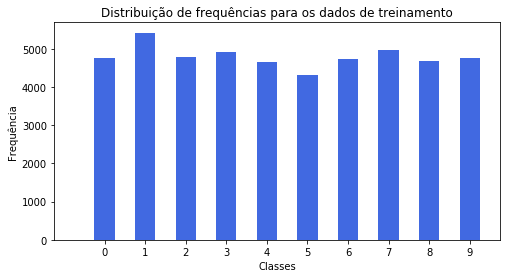

In [13]:
aux_train = plot_hist(Ytrain_categorical, titleText='Distribuição de frequências para os dados de treinamento', ymax=10000, step=1000)

aux = aux_train[0]
aux = aux[1:len(aux):2]
aux = aux*100/Xtrain.shape[0]
print('Representação das classes no conjunto de treinamento:')
for i in range(len(aux)):
    print(f'Classe {i}:  {round(aux[i],2)}%')

Representação das classes no conjunto de treinamento:
Classe 0:  9.79%
Classe 1:  11.02%
Classe 2:  9.78%
Classe 3:  10.16%
Classe 4:  9.8%
Classe 5:  9.2%
Classe 6:  9.81%
Classe 7:  10.82%
Classe 8:  9.67%
Classe 9:  9.95%


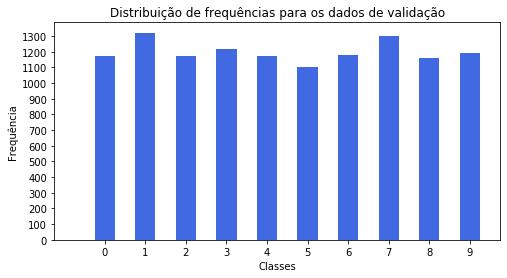

In [14]:
aux_val = plot_hist(Yval_categorical, titleText='Distribuição de frequências para os dados de validação', ymax=1500, step=100);

aux = aux_val[0]
aux = aux[1:len(aux):2]
aux = aux*100/Xval.shape[0]
print('Representação das classes no conjunto de treinamento:')
for i in range(len(aux)):
    print(f'Classe {i}:  {round(aux[i],2)}%', )

-----------------------------------------------------------------
<a id="modelo_linear"></a>
### Classificador Linear

- Nesta atividade utilizaremos o modelo de regressão linear para múltiplas saídas para o problema de classificação investigado.
- Neste modelo, cada saída é dada pela combinação linear entre seus parâmetros ajustáveis e os atributos dos dados de entrada.
- Considerando todos os N dados de treinamento, o modelo é dado por:

&nbsp;
$$\begin{bmatrix} 
\hat{y}_0(\textbf{x}(0)) & \hat{y}_1(\textbf{x}(0)) & \ldots & \hat{y}_{L-1}(\textbf{x}(0)) \\
\hat{y}_0(\textbf{x}(1)) & \hat{y}_1(\textbf{x}(1)) & \ldots & \hat{y}_{L-1}(\textbf{x}(1)) \\
\vdots & \vdots & \ddots & \vdots \\
\hat{y}_0(\textbf{x}(N-1)) & \hat{y}_1(\textbf{x}(N-1)) & \ldots & \hat{y}_{L-1}(\textbf{x}(N-1)) 
\end{bmatrix}_{NxL}
= 
\begin{bmatrix} 
1 & x_1(0) & ... & x_K(0) \\
1 & x_1(1) & ... & x_K(1) \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1(N-1) & ... & x_K(N-1) \\
\end{bmatrix}_{NxK+1} 
\begin{bmatrix} w_0^{(0)} & w_0^{(1)} & \ldots & w_0^{(L-1)} \\ 
w_1^{(0)} & w_1^{(1)} & \ldots & w_1^{(L-1)} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
w_K^{(0)} & w_K^{(1)} & ... & w_K^{(L-1)}
\end{bmatrix}_{K+1xL}$$
&nbsp;

em que as matrizes acima são, respectivamente, $\hat{Y}$, $\Phi$ e $W$. Desta forma, temos:

&nbsp;
$$ \hat{Y} = \Phi\textbf{W} $$
&nbsp;

- Observações:
    - Cada linha das matrizes $\hat{Y}$ e $\Phi$ contém as L saídas e os K atributos de uma amostra.
    - A primeira coluna da matriz $\Phi$ é referente ao termo de bias do modelo.
    - Cada coluna da matriz $W$, o qual contém os parâmetros ajustáveis do modelo, representa um classificador referente a cada uma das classes.
    - Há ainda a matriz de saídas desejadas $Y$ da forma:
$$
\textbf{Y}
=
\begin{bmatrix} 
y_0(\textbf{x}(0)) & y_1(\textbf{x}(0)) & \ldots & y_{L-1}(\textbf{x}(0)) \\
y_0(\textbf{x}(1)) & y_1(\textbf{x}(1)) & \ldots & y_{L-1}(\textbf{x}(1)) \\
\vdots & \vdots & \ddots & \vdots \\
y_0(\textbf{x}(N-1)) & y_1(\textbf{x}(N-1)) & \ldots & y_{L-1}(\textbf{x}(N-1)) 
\end{bmatrix}_{NxL}
$$
&nbsp;

- Nosso objetivo é obter um modelo de modo que as saídas estimadas sejam mais próximas possíveis das saídas desejadas. 
- A maneira usual, para o modelo de regressão linear, de expressar matematicamente esse objetivo consiste em utilizar o Critério de Quadrados Mínimos.
$$ min \; J_e(\textbf{W})$$
&nbsp;
- O problema se resume em minimizar o erro quadrático médio $J_e(\textbf{W})$ entre as saídas desejadas e estimadas.
$$J_e(\textbf{W}) = \frac{1}{NL}\sum_{i=0}^{N-1}\sum_{k=0}^{L-1}[y_k(i)-\hat{y}_k(i)]^2$$
&nbsp;

- Se $N > K+1$ e a matriz $\Phi$ tiver posto completo, a solução do problema de otimização é:
$$ \textbf{W} = (\Phi^T\Phi)^{-1}\Phi^T\textbf{Y}$$

<a id="modelo_linear_regularizado"></a>
- **Modelo Linear Regularizado**
    - Em nosso problema, $N > K+1$ e a matriz $\Phi$ não tem posto completo. Como consequência, o problema de otimização apresentado anteriormente não tem solução factível pois o termo $\Phi^T\Phi$ não admite inversa.
    - Para resolver esse problema, utilizamos a técnica de regularização *Ridge Regression*, em que aplicamos um termo de penalização proporcional à norma da matriz de parâmetros. Assim, o problema de otimização e sua solução são da seguinte forma:
$$ 
min \; J_e(\textbf{W})-\lambda\parallel\textbf{W}\parallel
$$
&nbsp;
$$
\textbf{W} = (\Phi^T\Phi+\lambda \textbf{I'})^{-1}\Phi^T\textbf{Y}
$$
    onde $\lambda>0$ é o coeficiente de regularização e 

$$
\textbf{I'}
=
\begin{bmatrix} 
0 & 0 & \ldots & 0 \\
0 & 1 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & 1
\end{bmatrix}_{NxL}
$$

In [15]:
class LinearClassifier():
    
    def __init__(self, Xtrain, Ytrain, Xpred, Ypred):
        self.Xt = Xtrain
        self.Yt = Ytrain
        self.Xp = Xpred
        self.Yp = Ypred
        [self.Nt, self.K] = Xtrain.shape
        self.Np = Xpred.shape[0]

        # variáveis de treinamento:
        self.Im = np.insert(np.insert(np.eye(self.K), 0, np.zeros([1, self.K]), axis=0), 0, np.zeros([1, self.K+1]), axis=1)
        self.Phi_t = np.insert(self.Xt, 0, np.ones([1, self.Nt]), axis=1)
        self.W = None
        
        # variáveis de predição
        self.Phi_p = np.insert(self.Xp, 0, np.ones([1, self.Np]), axis=1)
        self.Yest = None  # saídas estimadas na predição
        self.Yest_onehot = None # saídas estimadas na predição dadas na representação one-hot encoding
    
    def fit(self, coefReg):
        self.W = np.linalg.inv(np.transpose(self.Phi_t).dot(self.Phi_t) + coefReg*self.Im).dot(np.transpose(self.Phi_t).dot(self.Yt))
    
    def predict(self):
        self.Yest = self.Phi_p.dot(self.W)
        LinearClassifier.onehotencoding(self)
        
    def onehotencoding(self):
        # Cria uma matriz de saídas estimadas na representação one-hot encoding:
        self.Yest_onehot = self.Yest.copy()
        for i in range(0, self.Yest_onehot.shape[0]):   
            np.place(self.Yest_onehot[i], self.Yest_onehot[i] < np.max(self.Yest_onehot[i]), 0)
            np.place(self.Yest_onehot[i], self.Yest_onehot[i] == np.max(self.Yest_onehot[i]), 1)


<a id="param_desempenho"></a>
- **Parâmetros de desempenho**

In [16]:
class Metrics():
    
    def __init__(self, Y, Yest, Yest_onehot):
        self.Y = Y
        self.Yest = Yest
        self.Yest_onehot = Yest_onehot
        
        self.MSE = None
        self.CE = None
    
    def meansquared_error(self):
        e = (self.Y - self.Yest)**2
        self.MSE = np.sum(np.sum(e, axis=1), axis=0) # / (N*L), onde [N, L] = self.Yval.shape
        return self.MSE
    
    def classification_error(self):
        matches = []
        
        for i in range(0, self.Y.shape[0]):
            matches.append(np.array_equal(self.Y[i], self.Yest_onehot[i]))
        
        score = matches.count(True)
        err = self.Y.shape[0] - score
        self.CE = err/(err + score)
        return self.CE

-----------------------------------------------------------------
<a id="resolucao"></a>
### Resolução do problema

In [ ]:
classificador = LinearClassifier(Xtrain, Ytrain, Xval, Yval)
lista = range(-10, 21, 2)
coefs = [2**exp for exp in lista]
ms_errors = []
classification_errors = []

for coef in coefs:
    classificador.fit(coef)
    classificador.predict()
    
    desempenho = Metrics(Yval, classificador.Yest, classificador.Yest_onehot)
    
    ms_errors.append(desempenho.meansquared_error())
    classification_errors.append(desempenho.classification_error())

In [ ]:
plt.figure(figsize=(10,5))
plt.semilogx(coefs[0:25], ms_errors[0:25])
plt.grid(True, which="both")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.semilogx(coefs, [1-erro for erro in classification_errors])
plt.grid(True, which="both")
plt.show()